# Comparing Mask R-CNN and Transformer 
...on an image using the custom functions

### Load custom library

In [1]:
import iUROP_custom 
%matplotlib inline

c:\Users\f-bon\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\detr\feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if y


fatal: destination path 'tpu' already exists and is not an empty directory.


Instructions for updating:
Use `tf.saved_model.load` instead.
INFO:tensorflow:Restoring parameters from /tmp/mask-rcnn\variables\variables
Mask RCNN loaded successfully


## Load image

In [2]:
image = 'c6431e1d-fe35-4b97-a2e3-60e47e7ba921.jpg' # Provide relative image path


## Inference by DETR-Resnet50

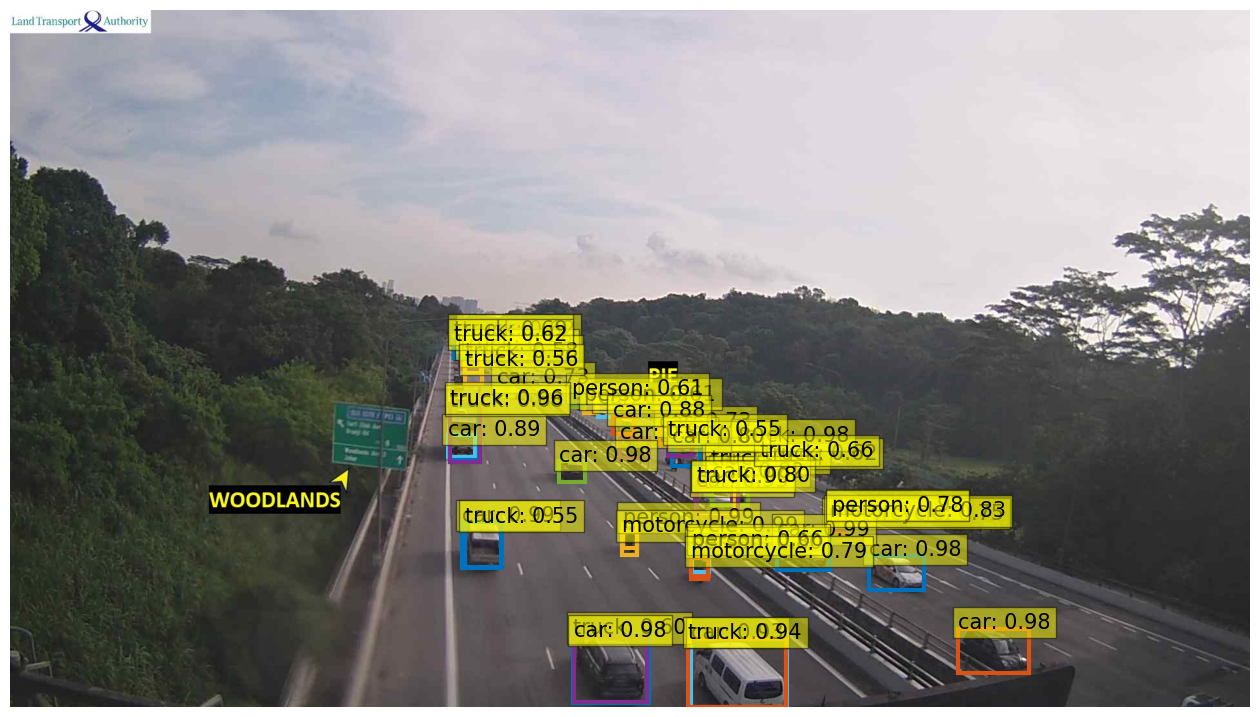

In [3]:

transformer_results, detection_time = iUROP_custom.detect_object_using_transformer(image, visualize=True, jpeg=True)


## Benchmarking results for DETR-Resnet50

In [4]:
benchmark_summary_tran = iUROP_custom.benchmark_summary_transformer([transformer_results], detection_time=[detection_time])
benchmark_summary_tran.head()

d:\AAStudium\Study\Semester_5\iUROP\iUROP_Code\iUROPCoding\ModelBenchmarking\iUROP_custom.py:249: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_results_transformer = pd.concat([benchmark_results_transformer, row], ignore_index=True)


,URL,TIME_SG,DETECTION_TIME,CAR_COUNT,CAR_AVG_CONF,CAR_BOXES,MOTOR_CYCLE_COUNT,MC_AVG_CONF,MC_BOXES,BUS_COUNT,BUS_AVG_CONF,BUS_BOXESMC_BOXES,TRUCK_COUNT,TRUCK_AVG_CONF,TRUCK_BOXES,BUS_BOXES
0,N,N,[325.576],18,0.874407,"[[699, 792, 759, 863], [1004, 646, 1034, 671],...",4,0.840512,"[[1265, 788, 1289, 809], [946, 808, 970, 843],...",0,N/A,NaN,17,0.678594,"[[699, 504, 725, 527], [696, 527, 722, 556], [...",[]


## Inference by Mask-RCNN

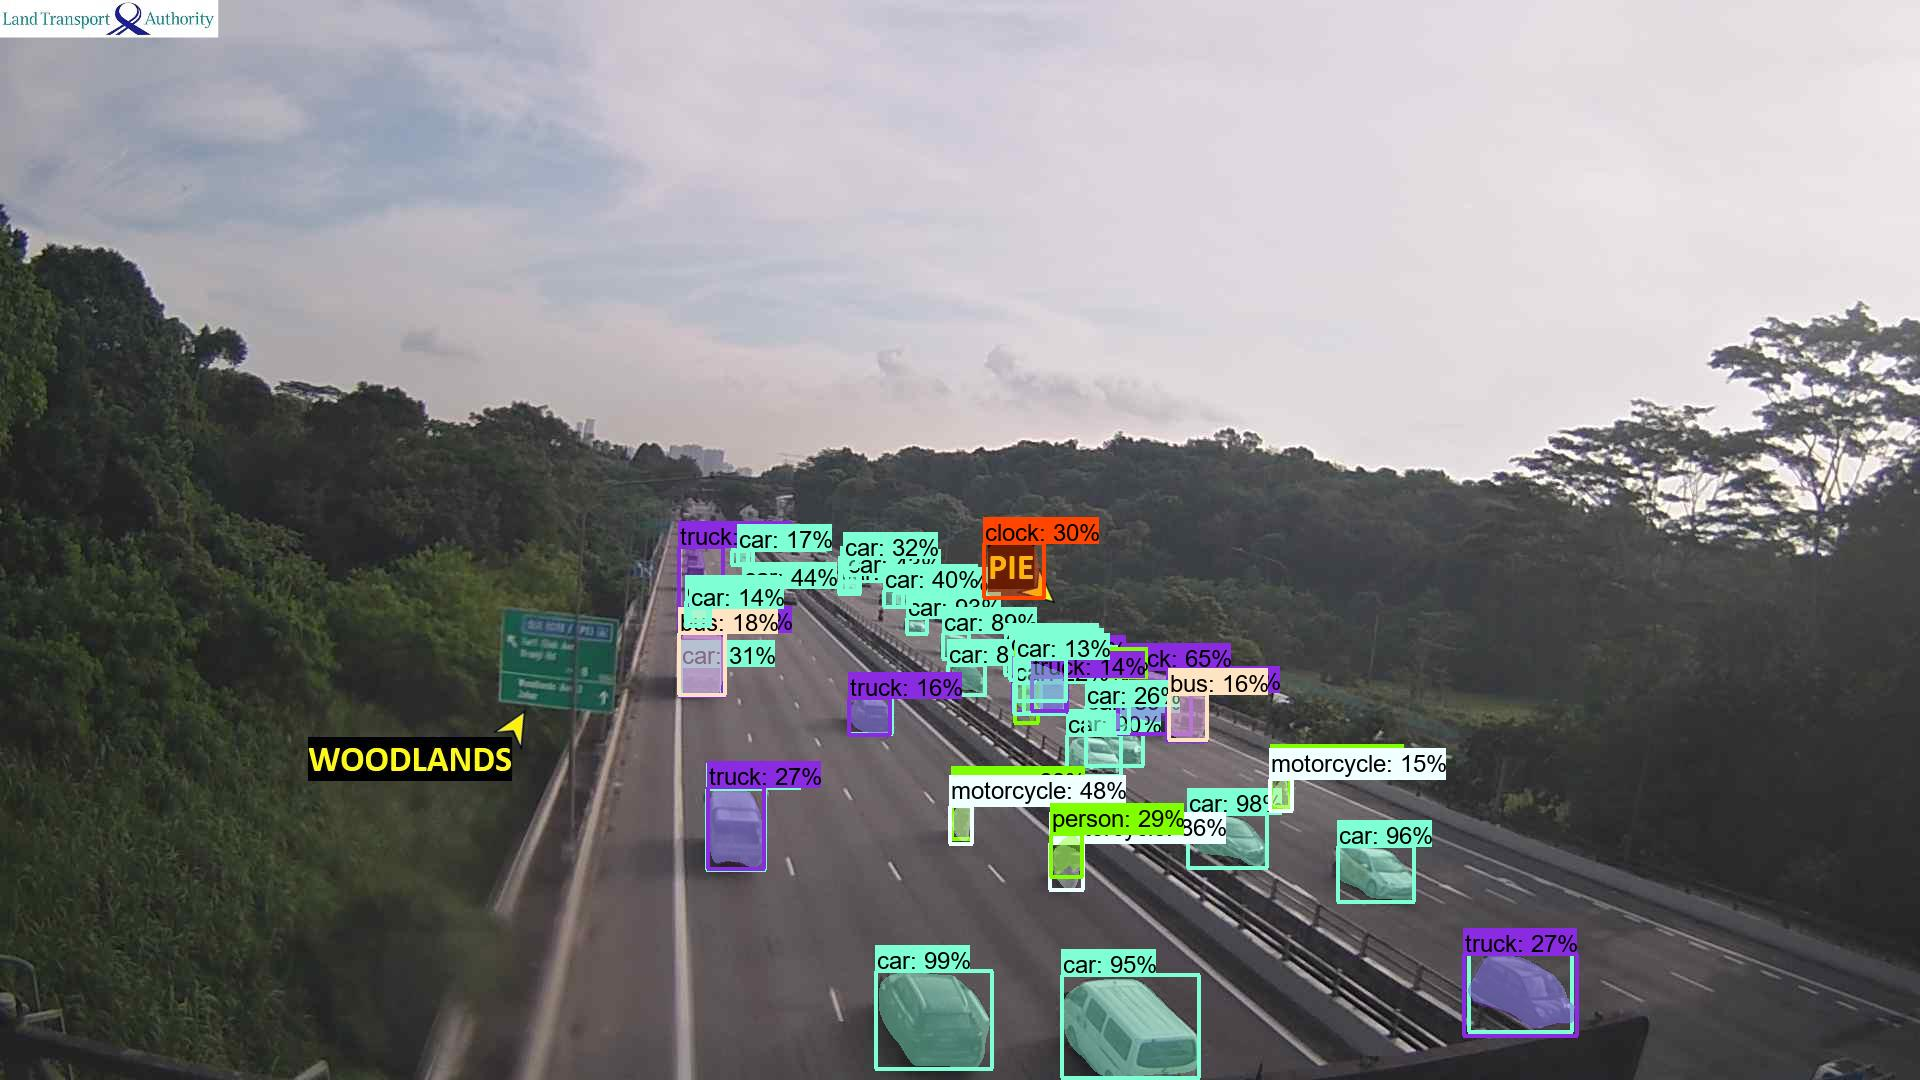

In [5]:
mask_rcnn_results = iUROP_custom.detect_object_using_mask_rcnn(image,visualize=True)

## Benchmarking results for Mask-RCNN

In [6]:
benchmark_summary_mask_rcnn = iUROP_custom.benchmark_summary_mask_rcnn([mask_rcnn_results],[["N/A"]],[["N/A"]])
benchmark_summary_mask_rcnn.head()

d:\AAStudium\Study\Semester_5\iUROP\iUROP_Code\iUROPCoding\ModelBenchmarking\iUROP_custom.py:561: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_results_mask_rcnn = pd.concat([benchmark_results_mask_rcnn, row], ignore_index=True)


,URL,TIME_SG,DETECTION_TIME,CAR_COUNT,CAR_AVG_CONF,CAR_BOXES,MOTOR_CYCLE_COUNT,MC_AVG_CONF,MC_BOXES,BUS_COUNT,BUS_AVG_CONF,BUS_BOXESMC_BOXES,TRUCK_COUNT,TRUCK_AVG_CONF,TRUCK_BOXES,BUS_BOXES
0,[N/A],[N/A],646.22,47,0.416282,"[[971.58685, 875.5287, 1068.7855, 992.24365], ...",3,0.501045,"[[843.3573, 1049.864, 889.5533, 1083.2145], [8...",3,0.151976,NaN,17,0.262651,"[[632.90356, 678.6374, 695.6649, 725.0635], [6...","[[633.04034, 678.9105, 694.4673, 725.3563], [6..."


### Data of interest

In [10]:
import pandas as pd
data = {
    "Car Count": [benchmark_summary_tran['CAR_COUNT'][0], benchmark_summary_mask_rcnn['CAR_COUNT'][0]],
    "Bus Count": [benchmark_summary_tran['BUS_COUNT'][0], benchmark_summary_mask_rcnn['BUS_COUNT'][0]],
    "Truck Count": [benchmark_summary_tran['TRUCK_COUNT'][0], benchmark_summary_mask_rcnn['TRUCK_COUNT'][0]]
}

data_of_interest_no = pd.DataFrame(data, index=["DETR", "MASK-RCNN"])
data_of_interest_no.to_excel('testing_results/no_of_detections_c6431e1d-fe35-4b97-a2e3-60e47e7ba921.xlsx')
data_of_interest_no.head()

,Car Count,Bus Count,Truck Count
DETR,18,0,17
MASK-RCNN,47,3,17


In [11]:
data = {
    "Car Avg. Conf.": [benchmark_summary_tran['CAR_AVG_CONF'][0], benchmark_summary_mask_rcnn['CAR_AVG_CONF'][0]],
    "Bus Avg. Conf.": [benchmark_summary_tran['BUS_AVG_CONF'][0], benchmark_summary_mask_rcnn['BUS_AVG_CONF'][0]],
    "Truck Avg. Conf.": [benchmark_summary_tran['TRUCK_AVG_CONF'][0], benchmark_summary_mask_rcnn['TRUCK_AVG_CONF'][0]]
}

data_of_interest_conf = pd.DataFrame(data, index=["DETR", "MASK-RCNN"])
data_of_interest_conf.to_excel('testing_results/avg_conf_c6431e1d-fe35-4b97-a2e3-60e47e7ba921.xlsx')
data_of_interest_conf.head()

,Car Avg. Conf.,Bus Avg. Conf.,Truck Avg. Conf.
DETR,0.874407,N/A,0.678594
MASK-RCNN,0.416282,0.151976,0.262651


In [12]:
with open('testing_results/DETR_boundingboxes_c6431e1d-fe35-4b97-a2e3-60e47e7ba921.txt', 'w') as file:
    file.write(image + 'Bounding Boxes\n')
    file.write('DETR Car Bounding Boxes\n')
    for box in benchmark_summary_tran['CAR_BOXES'][0]:
        file.write(f"{box}\n")

    file.write(f"\n")

    file.write('DETR Bus Bounding Boxes\n')
    for box in benchmark_summary_tran['BUS_BOXES'][0]:
        file.write(f"{box}\n")
    
    file.write(f"\n")
    
    file.write('DETR Truck Bounding Boxes\n')
    for box in benchmark_summary_tran['TRUCK_BOXES'][0]:
        file.write(f"{box}\n")

with open('testing_results/MASK_RCNN_boundingboxes_c6431e1d-fe35-4b97-a2e3-60e47e7ba921.txt', 'w') as file:
    file.write(image + 'Bounding Boxes\n')
    file.write('MASK_RCNN Car Bounding Boxes\n')
    for box in benchmark_summary_mask_rcnn['CAR_BOXES'][0]:
        file.write(f"{box}\n")

    file.write(f"\n")

    file.write('MASK_RCNN Bus Bounding Boxes\n')
    for box in benchmark_summary_mask_rcnn['BUS_BOXES'][0]:
        file.write(f"{box}\n")
    
    file.write(f"\n")
    
    file.write('MASK_RCNN Truck Bounding Boxes\n')
    for box in benchmark_summary_mask_rcnn['TRUCK_BOXES'][0]:
        file.write(f"{box}\n")